In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.ensemble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

In [3]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
df.shape

(235795, 56)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

## Checking for null values

In [6]:
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

## Remove unnecessary columns

In [7]:
df.drop(['FILENAME', 'URL', 'Domain', 'Title'],axis=1,inplace=True)

In [8]:
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


## Label encoding on categorical columns

In [9]:
label_encoder = LabelEncoder()

In [10]:
df['TLD'] = label_encoder.fit_transform(df['TLD'])

## Outlier detection

In [11]:
# Outlier detection and removal using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
df['outlier'] = iso_forest.fit_predict(df.select_dtypes(include=[np.number]))  # only numerical columns
df = df[df['outlier'] == 1]  # keep inliers
df.drop(columns=['outlier'], inplace=True)

## Standardisation of data

In [12]:
# Step 1: Standardize the Data
features = df.drop(columns=['label'])  # Assuming 'label' is the target variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
scaled_features

array([[-3.65559798e-02,  3.27756879e-01, -2.47379823e-02, ...,
         5.14797924e-01, -1.35452825e-01,  8.45669812e-01],
       [-5.32537825e-01, -6.26499577e-01, -2.47379823e-02, ...,
        -1.64052318e-01, -1.35452825e-01,  1.82157310e+00],
       [-1.60551441e-01,  8.91927648e-02, -2.47379823e-02, ...,
        -1.38595434e-01,  6.08042327e-03, -4.03066653e-01],
       ...,
       [-9.85537105e-02,  2.08474822e-01, -2.47379823e-02, ...,
        -2.82538589e-03,  6.08042327e-03,  2.47535539e-01],
       [ 1.45138956e+00,  3.07124419e+00, -2.47379823e-02, ...,
        -4.94991812e-01, -1.35452825e-01, -4.55534572e-01],
       [ 8.74394815e-02,  5.66320993e-01, -2.47379823e-02, ...,
         1.67732896e+00, -1.35452825e-01,  2.28329078e+00]])

## Applying PCA to find feature importance

In [14]:
# Apply PCA
pca = PCA()  # Adjust the number of components as needed
pca_features = pca.fit_transform(scaled_features)

In [15]:
# Create a DataFrame with the PCA features
pca_df = pd.DataFrame(data=pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

In [16]:
# Now that the PCA has been fitted, we can calculate the loadings
# Get the loadings (weights) of the features
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [17]:
# Calculate feature importance as the sum of absolute loadings for each feature
importance = np.abs(loadings).sum(axis=1)

In [18]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

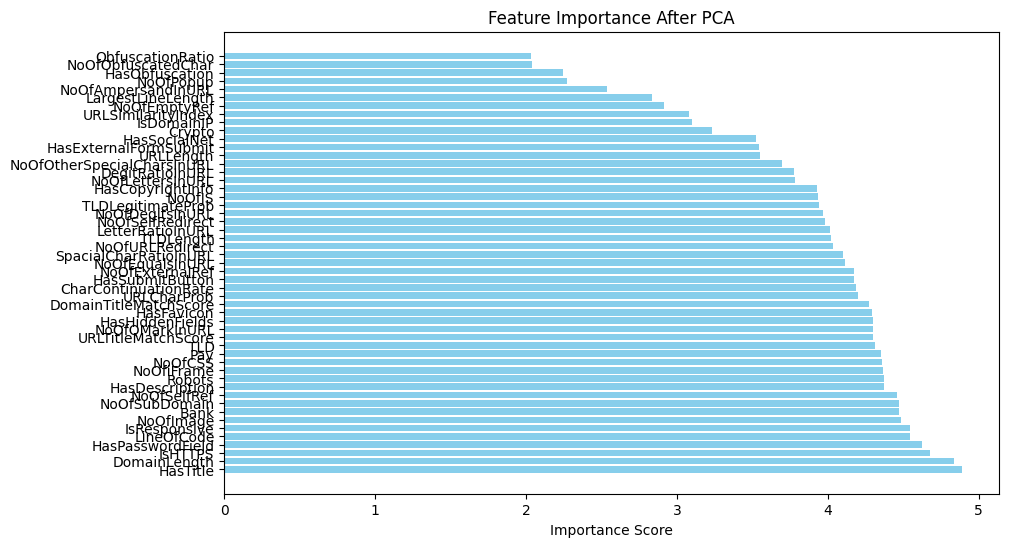

In [19]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance After PCA')
plt.show()

## Dropping the columns below threshold

In [20]:
threshold = 4  # Adjust threshold as needed
features_to_drop = importance_df[importance_df['Importance'] < threshold]['Feature']
df_reduced = df.drop(columns=features_to_drop)

In [21]:
# Combine PCA features with the relevant label column
result_df = pd.concat([df_reduced['label'], pca_df], axis=1)

In [22]:
# Display the result
result_df.head()
print(f"Columns dropped: {features_to_drop.tolist()}")
print("Reduced DataFrame shape:", df_reduced.shape)

Columns dropped: ['NoOfSelfRedirect', 'NoOfDegitsInURL', 'TLDLegitimateProb', 'NoOfJS', 'HasCopyrightInfo', 'NoOfLettersInURL', 'DegitRatioInURL', 'NoOfOtherSpecialCharsInURL', 'URLLength', 'HasExternalFormSubmit', 'HasSocialNet', 'Crypto', 'IsDomainIP', 'URLSimilarityIndex', 'NoOfEmptyRef', 'LargestLineLength', 'NoOfAmpersandInURL', 'NoOfPopup', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio']
Reduced DataFrame shape: (224005, 31)


In [23]:
df_reduced.head()

,DomainLength,TLD,CharContinuationRate,URLCharProb,TLDLength,NoOfSubDomain,LetterRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,SpacialCharRatioInURL,...,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,NoOfImage,NoOfCSS,NoOfSelfRef,NoOfExternalRef,label
0,24,231,1.000000,0.061933,3,1,0.581,0,0,0.032,...,1,1,0,1,0,34,20,119,124,1
1,16,254,0.666667,0.050207,2,1,0.391,0,0,0.087,...,1,0,0,0,0,50,9,39,217,1
2,22,647,0.866667,0.064129,2,2,0.517,0,0,0.069,...,1,1,0,0,0,10,2,42,5,1
3,19,231,1.000000,0.057606,3,1,0.500,0,0,0.038,...,1,1,0,0,1,3,27,22,31,1
4,26,503,1.000000,0.059441,3,1,0.606,0,0,0.030,...,1,1,0,1,1,244,15,72,85,1


In [24]:
df_reduced.shape

(224005, 31)

## Applying Z-score normalisation

In [25]:
# Separate the features and the target label
features = df_reduced.drop(columns=['label'])  # Exclude the target label if it's in the data
target = df_reduced['label']  # Assuming 'label' is your target column

In [26]:
# Initialize the StandardScaler (which performs Z-score normalization)
scaler = StandardScaler()

In [27]:
# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(features)

In [28]:
# Convert the scaled features back into a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [29]:
# Combine the scaled features with the target label
final_df = pd.concat([scaled_df, target.reset_index(drop=True)], axis=1)

In [30]:
final_df.head()

,DomainLength,TLD,CharContinuationRate,URLCharProb,TLDLength,NoOfSubDomain,LetterRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,SpacialCharRatioInURL,...,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,NoOfImage,NoOfCSS,NoOfSelfRef,NoOfExternalRef,label
0,0.327757,-0.612241,0.702262,0.564266,0.395062,-0.270236,0.555651,-0.089864,-0.117188,-0.960848,...,1.229496,1.32186,-0.303655,2.747573,-0.537215,0.217040,1.209409,0.514798,0.845670,1
1,-0.626500,-0.452245,-0.870528,-0.568653,-1.298737,-0.270236,-1.011426,-0.089864,-0.117188,0.775975,...,1.229496,-0.75651,-0.303655,-0.363958,-0.537215,0.526076,0.265536,-0.164052,1.821573,1
2,0.089193,2.281599,0.073146,0.776391,-1.298737,1.463224,0.027793,-0.089864,-0.117188,0.207560,...,1.229496,1.32186,-0.303655,-0.363958,-0.537215,-0.246515,-0.335110,-0.138595,-0.403067,1
3,-0.268653,-0.612241,0.702262,0.146167,0.395062,-0.270236,-0.112419,-0.089864,-0.117188,-0.771377,...,1.229496,1.32186,-0.303655,-0.363958,1.861453,-0.381718,1.810056,-0.308308,-0.130233,1
4,0.566321,1.279885,0.702262,0.323519,0.395062,-0.270236,0.761845,-0.089864,-0.117188,-1.024006,...,1.229496,1.32186,-0.303655,2.747573,1.861453,4.273142,0.780376,0.115973,0.436420,1


## Converting into CSV file

In [31]:
final_df.to_csv("Preprocessed data.csv")